# load n Preprocess the data

In [1]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
X = iris['data']
y = iris['target']

target_names = iris['target_names']

print(X.shape)
print(y.shape)
print(target_names)

(150, 4)
(150,)
['setosa' 'versicolor' 'virginica']


# EDA

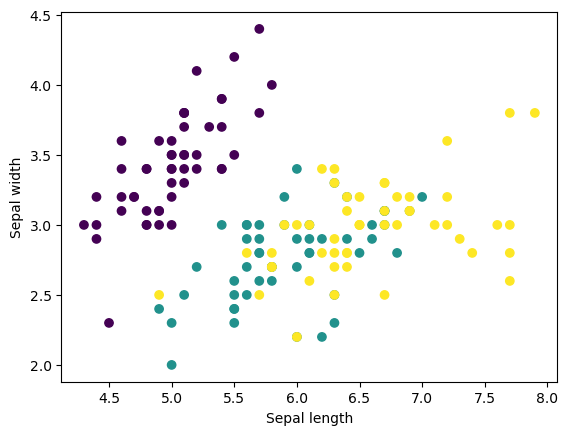

In [6]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

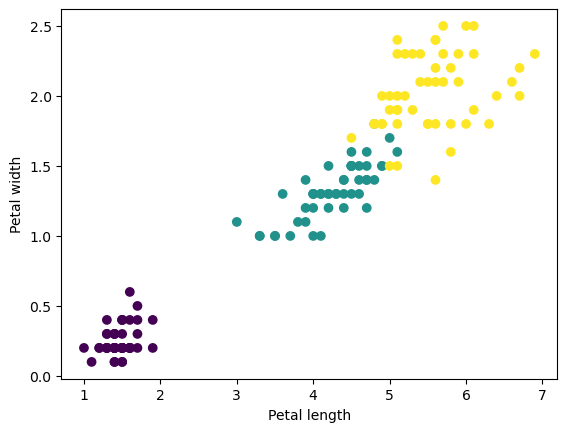

In [7]:
plt.scatter(X[:,2], X[:,3], c=y)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

In [8]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

# Train the model

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state=22)

In [27]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

# Evaluate the model

In [28]:
y_pred = model.predict(X_test)
print(y_pred)

[0 2 1 2 1 1 1 1 1 0 2 1 2 2 0 2 1 1 1 1 0 2 0 1 2 0 2 2 2 2]


In [29]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [30]:
model.score(X_test, y_test)

0.9333333333333333

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.83      1.00      0.91        10
           2       1.00      0.86      0.92        14

    accuracy                           0.93        30
   macro avg       0.94      0.95      0.94        30
weighted avg       0.94      0.93      0.93        30



In [32]:
print(accuracy_score(y_test, y_pred))

0.9333333333333333


In [33]:
cm = confusion_matrix(y_test,y_pred)
cm
                    

array([[ 6,  0,  0],
       [ 0, 10,  0],
       [ 0,  2, 12]], dtype=int64)

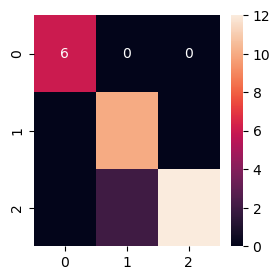

In [34]:
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True)
plt.show()

In [36]:
# Final Pred

sepal_lt = 1.3
sepal_wt = 8.0

petal_lt = 9.2
petal_wt = 8.4

dummy_data = [[sepal_lt, sepal_wt, petal_lt, petal_wt]]

pred = model.predict(dummy_data)[0]

flower_name = target_names[pred]

print('Flower name is:', flower_name)

Flower name is: virginica
